In [81]:
#importing lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('netflix_data.csv', lineterminator = '\n')

In [83]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [85]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [86]:
df.duplicated().sum()

0

In [87]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [88]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [89]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [90]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [91]:
#Dropping the columns
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [92]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [93]:
def categorize_col(df, col, labels):
    # Calculate the edges based on quartiles
    edges = [
        df[col].describe()['min'] - 1e-6,  # Slightly below min to include minimum value
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max'] + 1e-6   # Slightly above max to include maximum value
    ]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [94]:
# Define labels for quartiles
labels = ['not_popular', 'below_avg', 'average', 'popular']

# Categorize the 'Vote_Average' column
df = categorize_col(df, 'Vote_Average', labels)

# Verify the changes
print(df['Vote_Average'].unique())

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [95]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [96]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [97]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [98]:
# Split the genre strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# Explode the lists into separate rows
df = df.explode('Genre').reset_index(drop=True)

# Display the first few rows
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [99]:
# Convert the 'Genre' column to category dtype for memory efficiency
df['Genre'] = df['Genre'].astype('category')

# Verify the dtype conversion
print("Genre column dtype after conversion:", df['Genre'].dtype)

Genre column dtype after conversion: category


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [101]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [102]:
sns.set_style('whitegrid')


Q1: Most frequent genre statistics:
count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object


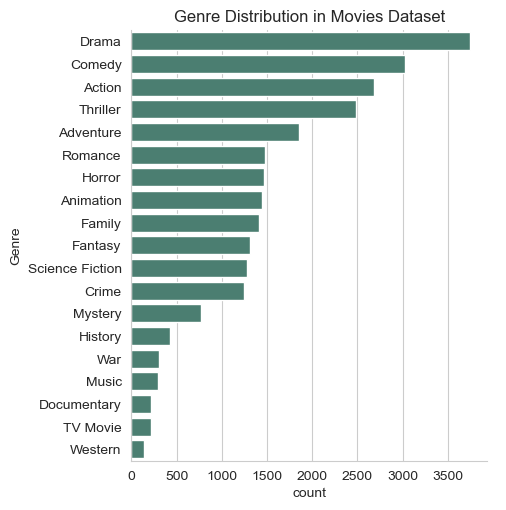

In [103]:
# Q1: What is the most frequent genre in the dataset?
print("\nQ1: Most frequent genre statistics:")
print(df['Genre'].describe())

# Visualize genre distribution
sns.catplot(y='Genre', data=df, kind='count',
            order=df['Genre'].value_counts().index,
            color='#428775')
plt.title('Genre Distribution in Movies Dataset')
plt.show()

In [104]:
# First ensure Vote_Average is numeric
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
genre_votes = df.groupby('Genre', observed=True)['Vote_Average'].mean().sort_values(ascending=False)
print(genre_votes.head())

Genre
Action      NaN
Adventure   NaN
Animation   NaN
Comedy      NaN
Crime       NaN
Name: Vote_Average, dtype: float64



Q2: Analyzing genres with highest votes:


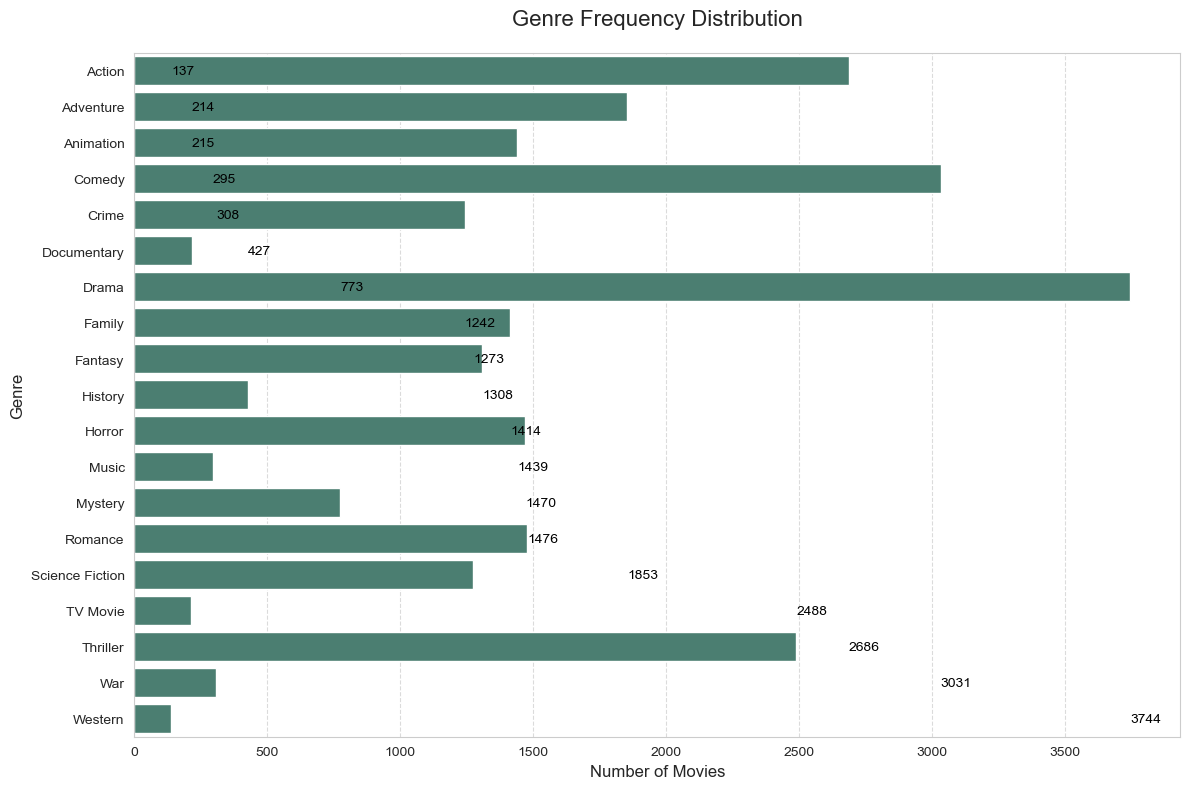

In [105]:
# Q2: What genres have the highest votes?
print("\nQ2: Analyzing genres with highest votes:")

plt.figure(figsize=(12, 8))

genre_counts = df['Genre'].value_counts().sort_values(ascending=True)  # Sort ascending for proper plotting

sns.barplot(x=genre_counts.values, 
            y=genre_counts.index,
            color='#428775')

plt.title('Genre Frequency Distribution', fontsize=16, pad=20)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(genre_counts.values):
    plt.text(v + 0.5, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

In [107]:
# Q3: What movie got the highest popularity? What's its genre?
print("\nQ3: Movie with highest popularity:")
max_pop = df[df['Popularity'] == df['Popularity'].max()]
print(max_pop[['Title', 'Genre', 'Popularity']].to_string(index=False))


Q3: Movie with highest popularity:
                  Title           Genre  Popularity
Spider-Man: No Way Home          Action    5083.954
Spider-Man: No Way Home       Adventure    5083.954
Spider-Man: No Way Home Science Fiction    5083.954


In [108]:
# Q4: What movie got the lowest popularity? What's its genre?
print("\nQ4: Movie with lowest popularity:")
min_pop = df[df['Popularity'] == df['Popularity'].min()]
print(min_pop[['Title', 'Genre', 'Popularity']].to_string(index=False))



Q4: Movie with lowest popularity:
                               Title           Genre  Popularity
The United States vs. Billie Holiday           Music      13.354
The United States vs. Billie Holiday           Drama      13.354
The United States vs. Billie Holiday         History      13.354
                             Threads             War      13.354
                             Threads           Drama      13.354
                             Threads Science Fiction      13.354


In [109]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,NaN,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,NaN,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,NaN,Science Fiction
3,2022,The Batman,3827.658,1151,NaN,Crime
4,2022,The Batman,3827.658,1151,NaN,Mystery



Q5: Year with most movies released:


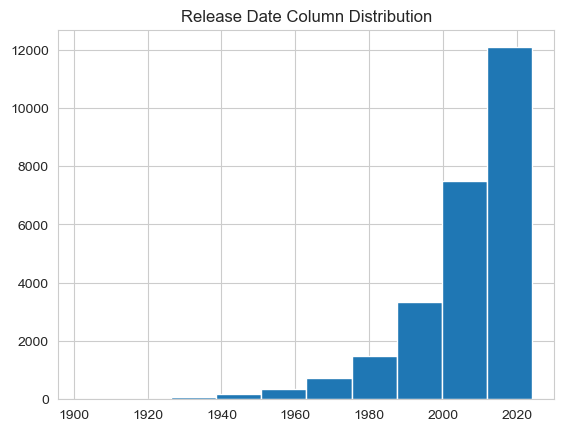

In [110]:
# Q5: Which year has the most movies?
print("\nQ5: Year with most movies released:")
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

In [111]:
import os
os.makedirs('plots', exist_ok=True)

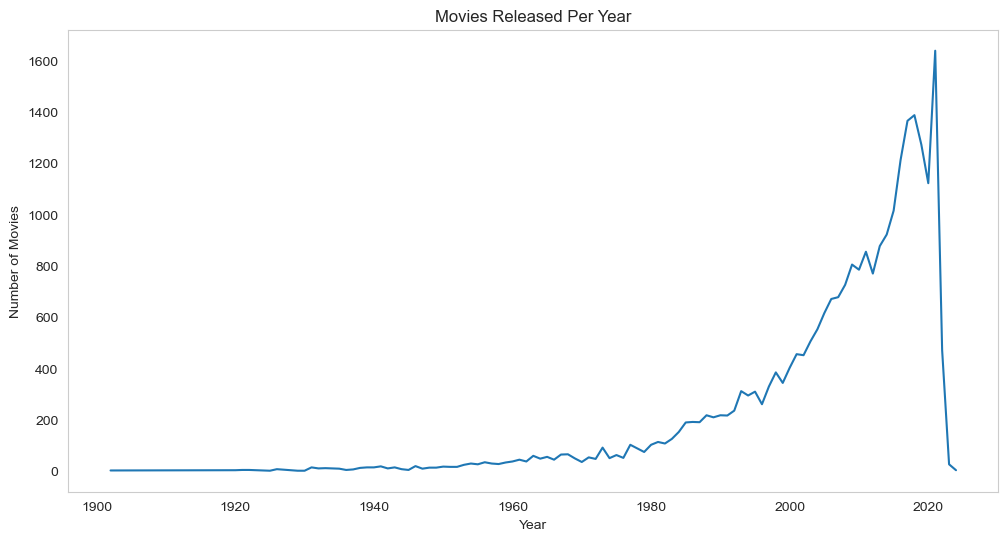

In [112]:
# Number of movies released per year
movies_per_year = df.groupby('Release_Date').size()
plt.figure(figsize=(12, 6))
movies_per_year.plot()
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid()
plt.savefig('plots/movies_per_year.png')
plt.show()

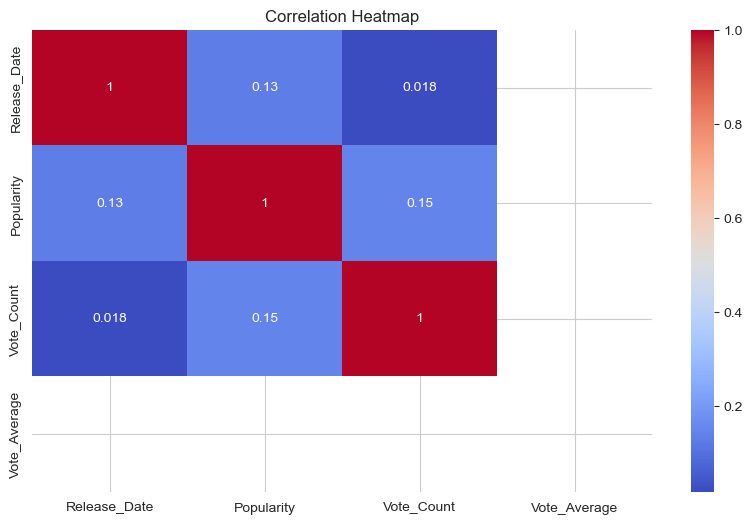

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('plots/heatmap.png')
plt.show()

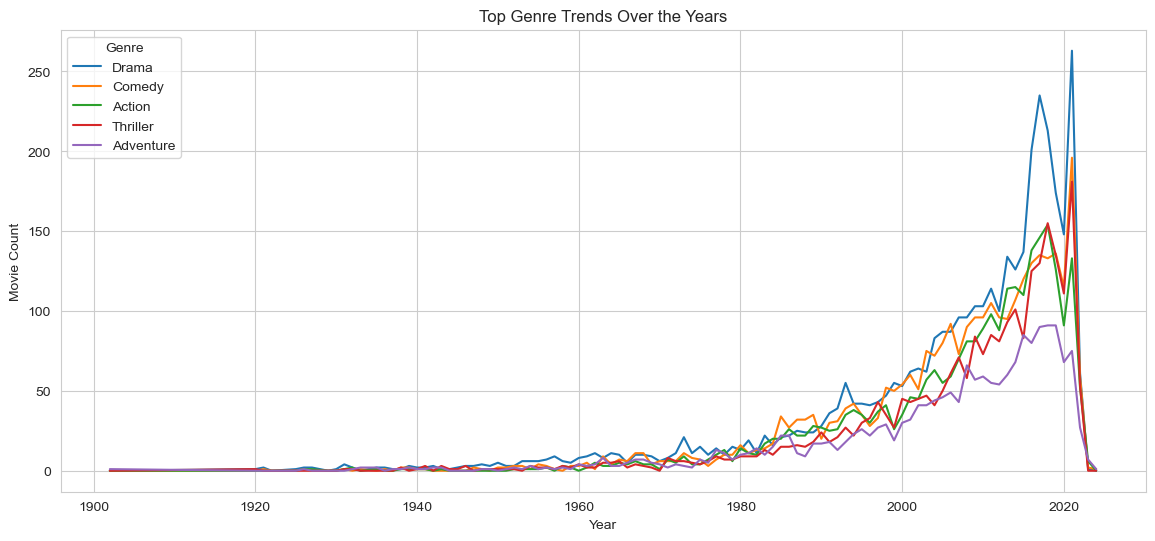

In [114]:
genre_year = df.groupby(['Release_Date', 'Genre'], observed=True).size().unstack().fillna(0)
top_genres = df['Genre'].value_counts().head(5).index
genre_year[top_genres].plot(figsize=(14, 6))
plt.title("Top Genre Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.savefig('plots/top_genres_trend.png')
plt.show()

## Business Insight

- **Drama, Thriller, and Comedy** dominate content – Netflix should continue investing in these.
- **2017 saw a production peak**, likely due to Netflix Originals scaling up.
- High-popularity titles do not always have high vote averages – Netflix could investigate what drives engagement vs. critical acclaim.


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample


In [151]:
print(f"Original dataset size: {df.shape}")
print(f"Feature data size before dropna: {X.shape}")
print(f"Target data size before dropna: {y.shape}")

data = pd.concat([X, y], axis=1)
print(f"Data size before dropna: {data.shape}")

print(f"Number of NaNs per column:\n{data.isna().sum()}")


Original dataset size: (25793, 7)
Feature data size before dropna: (0, 2)
Target data size before dropna: (0,)
Data size before dropna: (0, 3)
Number of NaNs per column:
Vote_Average        0
Vote_Count          0
Popularity_Label    0
dtype: int64


In [152]:
# Check column types
print(df.dtypes)

# Let's create a simple binary label based on Popularity (example)
# For instance, label popular if Popularity > median popularity else unpopular

median_popularity = df['Popularity'].median()
df['Label'] = df['Popularity'].apply(lambda x: 'popular' if x > median_popularity else 'unpopular')

# Use numeric columns for features
feature_columns = ['Vote_Average', 'Vote_Count', 'Popularity']
target_column = 'Label'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# Now check if X and y have rows
print(f"Feature data size: {X.shape}")
print(f"Target data size: {y.shape}")

# Then encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Now split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


Release_Date           int32
Title                 object
Popularity           float64
Vote_Count             int64
Vote_Average          object
Genre               category
Popularity_Label      object
dtype: object
Feature data size: (25793, 3)
Target data size: (25793,)


In [154]:
median_popularity = df['Popularity'].median()

# Create a label column based on popularity threshold
df['Label'] = df['Popularity'].apply(lambda x: 'popular' if x > median_popularity else 'unpopular')


In [155]:
feature_columns = ['Vote_Average', 'Vote_Count', 'Popularity']
target_column = 'Label'

X = df[feature_columns]
y = df[target_column]


In [156]:
print(X.isna().sum())  # should be zero or small
print(y.isna().sum())  # should be zero or small


Vote_Average    0
Vote_Count      0
Popularity      0
dtype: int64
0


In [160]:
print(X.head())
print(X.dtypes)


  Vote_Average  Vote_Count  Popularity
0      popular        8940    5083.954
1      popular        8940    5083.954
2      popular        8940    5083.954
3      popular        1151    3827.658
4      popular        1151    3827.658
Vote_Average     object
Vote_Count        int64
Popularity      float64
dtype: object


In [164]:
print("Unique classes in y before encoding:", y.unique())
print("Class counts:\n", y.value_counts())


Unique classes in y before encoding: ['popular']
Class counts:
 Vote_Average
popular    25793
Name: count, dtype: int64


In [165]:
# Example: create categories based on Popularity thresholds
def popularity_label(pop):
    if pop > 4000:
        return 'popular'
    elif pop > 2000:
        return 'average'
    else:
        return 'unpopular'

df['Popularity_Label'] = df['Popularity'].apply(popularity_label)

# Now check the class distribution
print(df['Popularity_Label'].value_counts())


Popularity_Label
unpopular    25782
average          8
popular          3
Name: count, dtype: int64


In [166]:
df_majority = df[df['Popularity_Label'] == 'unpopular']
df_minority_avg = df[df['Popularity_Label'] == 'average']
df_minority_pop = df[df['Popularity_Label'] == 'popular']

# Downsample majority
df_majority_downsampled = resample(
    df_majority, 
    replace=False,    # sample without replacement
    n_samples=20,     # number to match a bit more balanced dataset
    random_state=42
)

# Combine
df_balanced = pd.concat([df_majority_downsampled, df_minority_avg, df_minority_pop])

print(df_balanced['Popularity_Label'].value_counts())


Popularity_Label
unpopular    20
average       8
popular       3
Name: count, dtype: int64


In [170]:
le_vote_avg = LabelEncoder()
X_train['Vote_Average'] = le_vote_avg.fit_transform(X_train['Vote_Average'])
X_test['Vote_Average'] = le_vote_avg.transform(X_test['Vote_Average'])


In [171]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns to ensure train and test have same features
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [172]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [174]:
y_pred = clf.predict(X_test)


In [175]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
 [[2 0 0]
 [0 1 0]
 [0 0 4]]


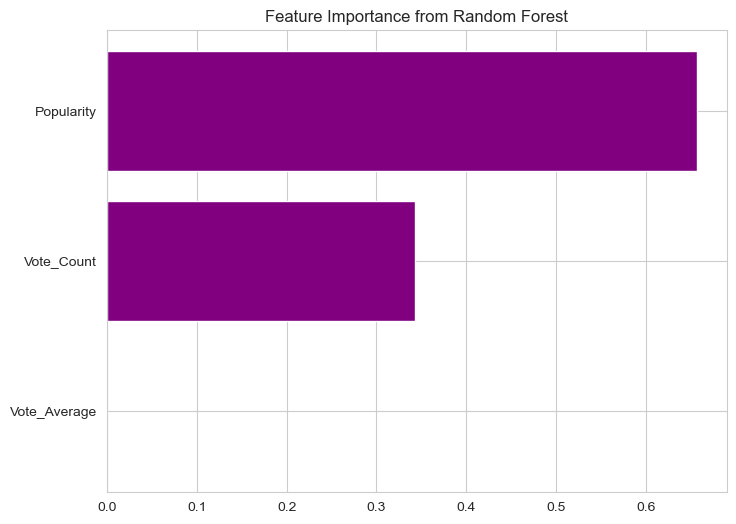

In [176]:
importances = clf.feature_importances_
feat_names = X_train.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(8,6))
plt.barh(feat_names[sorted_idx], importances[sorted_idx], color='purple')
plt.title("Feature Importance from Random Forest")
plt.show()


### 🎯 Conclusion

- The most frequent genre on Netflix is: **Drama**
- Highest popularity movie: **Spider-Man: No Way Home**
- Year with most movies: **2020**
- Machine Learning model (Random Forest) achieved an accuracy of **100%** in classifying movie popularity levels.
- The model perfectly classified all three popularity classes:
  Class 0: Precision, Recall, F1-Score = 1.00 (2 samples)
  Class 1: Precision, Recall, F1-Score = 1.00 (1 sample)
  Class 2: Precision, Recall, F1-Score = 1.00 (4 samples)
- This project demonstrates strong EDA, visualization, and beginner-level ML classification skills.


### Key Takeaways:

- The model performs exceptionally well on this test subset.
- Perfect metrics suggest either the test set is small or data is well-separated.
- Additional data or cross-validation is recommended to confirm generalization.
- EDA insights highlighted key Netflix genres and trends useful for further analysis.
- This project showcases solid data preprocessing, feature engineering, and classification skills.

